# BITAmin 12기 3차 정규세션 예습과제 (2023.09.06)

---

### 실습 1

## 1. 정확도(Accuracy) &  2. 오차 행렬

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 성능지표입니다.


### [오차행렬]
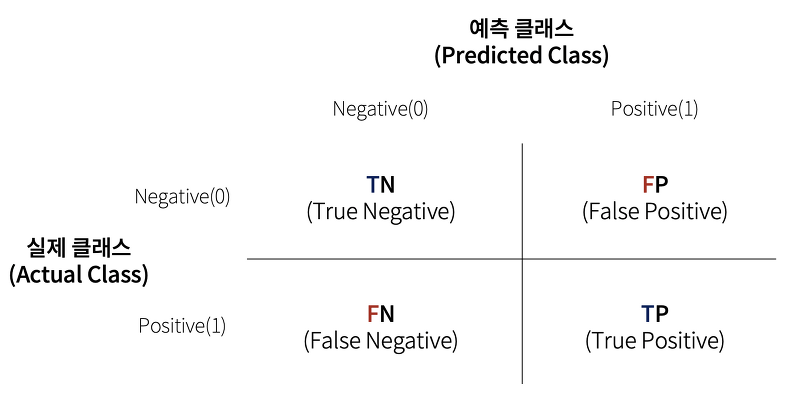](attachment:image.png)

위와 같은 오차행렬에서 정확도는 어떻게 정의 될까요? (TN, FP, FN, TP를 사용하여 수식으로 표현해주세요.)

- 전체 중 정확히 예측한 데이터의 비율\
(TN + TP) / (TN + FP + FN + TP)

## 3. 정밀도(Precision), 재현율(Recall) 계산하기

### 분류 지표 중 정밀도와 재현율을 계산하여 모델의 성능을 판별
학습용 데이터와 평가용 데이터의 정밀도와 재현율을 계산하고 그 성능을 비교해보겠습니다.

 ========정밀도와 재현율 계산을 위한 사이킷런 함수/라이브러리===========

@ precision_score(train_Y, y_pred_train)
: 학습용 데이터에 대한 정밀도(precision) 값을 계산합니다.

@ recall_score(train_Y, y_pred_train)
: 학습용 데이터에 대한 재현율(recall) 값을 계산합니다.

======================  데이터 정보   =======================

@ load_breast_cancer 유방암 유무 판별 데이터를 불러오는 함수

X(Feature 데이터) : 30개의 환자 데이터
Y(Label 데이터) : 0 음성(악성), 1 양성(정상)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

# 예측한 값을 저장합니다
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

### 3.1 precision_score를 사용하여 학습용, 평가용 데이터에 대한 정밀도를 계산하여 precision_train, precision_test에 저장하고 출력해봅시다.

In [3]:
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)
print(precision_train, precision_test)

1.0 0.9577464788732394


### 3.2 recall_score를 사용하여학습용, 평가용 데이터에 대한 재현율을 계산하여 recall_train, recall_test에 저장하고 출력해봅시다.

In [4]:
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)
print(recall_train, recall_test)

1.0 0.9577464788732394


# **04** F1 스코어

### 4-1. 다음 중 F1스코어 계산에 사용되지 않는 평가지표는 무엇일까요??  

#### 1. 정밀도 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2. 정확도 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3. 재현율 <br><br><br><br> 

- 2. 정확도

### 4-2. 다음 빈칸에 들어갈 알맞은 말을 골라주세요!! 

> ### F1 스코어는 _____ 상대적으로 높은 값을 가집니다.

#### 1. 정밀도보다 재현율이 높을 때 &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; 2. 재현율보다 정밀도가 높을 때  &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;3. 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때

- 3. 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때

---

# **05** ROC 곡선과 AUC

### 일반적으로 AUC의 값이 어떤 수에 가까울수록 분류 성능이 좋다고 판정되나요?

- 일반적으로 1에 가까울수록 분류 성능이 좋다고 판정

---

# **06** 파마 인디언 당뇨병 예측

### 6-1. 실습 자료 다운
www.kaggle.com/uciml/pima-indians-diabetes-database 에 접속하고 download 버튼을 클릭하여 실습에 필요한 압축파일을 미리 다운받아봅시다.

### 6-2. 실습 파일을 생성하여 아래의 모듈 임포트 후 diabetes.csv을 DataFrame으로 로딩하여 diabetes_data에 저장하세요. diabetes_data의 데이터 분포도와 Outcome열의 데이터 분포를 확인하고, feature의 타입과 null 개수를 살펴봅니다. 아래 코드의 None을 채우시오.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Todo : diabetes.csv을 DataFrame으로 로딩
diabetes_data = pd.read_csv('diabetes.csv')

#Todo : diabetes_data의 데이터 분포도 확인
diabetes_data.describe()

#Todo : Outcome열의 데이터 분포 확인
print(diabetes_data.Outcome.value_counts().reset_index())

#feature의 타입 및 null 개수 파악
diabetes_data.info()

   index  Outcome
0      0      500
1      1      268
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 6-3. 예측 분석을 위한 회귀분석 중 Outcome열의 데이터 분포처럼 종속변수가 이분형일 경우 수행할 수 있는 대표적인 분석 기법은 무엇인지 답하시오.

- 로지스틱 회귀 (LogisticRegression)

### 6-4. 아래의 코드 실행을 통해 학습 데이터 셋과 테스트 데이터 셋을 나누고 6-3에서 답한 모델을 사용하여 학습 및 예측을 진행하시오.

In [6]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝 컬럼이 레이블 값이 되는 Outcome 컬럼이므로 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)


In [7]:
lr = LogisticRegression()

In [8]:
lr.fit(X_train, y_train)

C:\Users\82109\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
pred = lr.predict(X_test)

In [11]:
accuracy_score(y_test, pred)

0.7727272727272727

-----

### 실습 2

In [13]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd

# 데이터 분석을 위한 패키지
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder


# 시각화를 위한 패키지
import matplotlib.pyplot as plt

# 경고 메세지 무시

### Q1. Mushroom Data set  (45점)

1) 주어진 데이터 mushroom.csv 를 pandas dataframe 으로 불러온 후, mushroom으로 저장하고, head를 이용해 확인해주세요. (2점)

In [14]:
mushroom = pd.read_csv('mushroom.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2) mushroom 데이터 내에 결측치가 존재하는지 확인하세요 (3점)


In [16]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**버섯 분류 모델을 위한 코드입니다.
다음 코드를 로드해주세요.**

In [17]:
X = mushroom.drop(['class'],axis=1)
y = mushroom['class']


X = pd.get_dummies(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

#20%의 테스트 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# GINI계수를 사용하고,  maximum depth가 3인 분류모델 생성
clf_mush = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# 모델 학습
clf_mush.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

3) mushpred라는 변수에 clf_mush 분류모델을 사용해, X_test에 대한 예측결과를 할당하세요 (4점)


In [18]:
mushpred = clf_mush.predict(X_test)

4) clf_mush 모델의 정확도를 알아보겠습니다  
아래 형식으로 모델의 정확도를 출력하세요 (5점)



    정확도:0.***

In [21]:
score = accuracy_score(y_test, mushpred)
print("정확도:{0:.3f}".format(score))

정확도:0.990


5) clf_mush의 예측결과인 mushpred와 실제결과인 y_test를 인자로 입력해 어레이 형태의 오차행렬을 출력하세요 (5점)



In [22]:
confusion_matrix(y_test, mushpred)

array([[809,  11],
       [  5, 800]], dtype=int64)

6) clf_mush모델의 정밀도와 재현율을 알아보겠습니다  
정밀도와 재현율을 구해 아래형식으로 출력하세요  (8점)

     정밀도: 0.****, 재현율: 0.****



In [25]:
recall_score(y_test, mushpred)

0.9937888198757764

In [30]:
precision_test = precision_score(y_test, mushpred)
recall_test = recall_score(y_test, mushpred)
print("정밀도:", round(precision_test, 3))
print("재현율:", round(recall_test, 3))

정밀도: 0.986
재현율: 0.994


7) clf_mush 모델의 F1스코어를 알아보겠습니다  
아래 형식으로 모델의 F1스코어를 출력하세요   (5점)



    F1스코어:0.***

In [31]:
f1 = f1_score(y_test, mushpred)
print("F1스코어:{0:.3f}".format(f1))

F1스코어:0.990


8) FPR변화에 따른 TPR의 변화를 ROC 곡선으로 시각화하세요  
그래프 옵션은 아래를 참고해주세요 (8점)

    start, end =plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

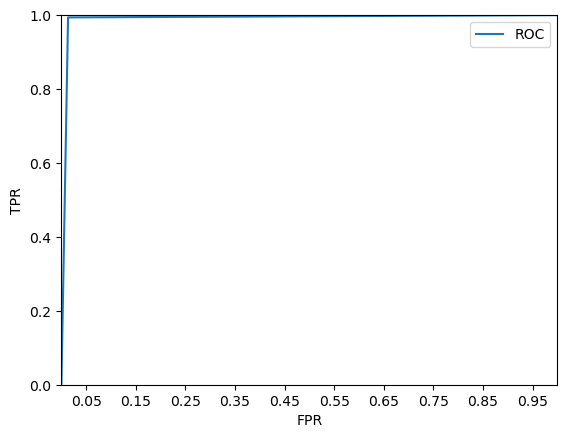

In [35]:
fprs, tprs, thresholds = roc_curve(y_test, mushpred)

plt.plot(fprs, tprs, label = 'ROC')

start, end =plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR') # 재현율
plt.legend()

9) clf_mush모델의 AUC면적을 구해 소수점 4번째자리까지 출력하세요 (5점)

In [36]:
roc_score = roc_auc_score(y_test, mushpred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9902


## Q2. Titanic Data set (40점)

** 컬럼 별 설명**

* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton



## Q2-1. titanic data set을 titanic 변수에 load하고, 데이터셋의 상위 3행과 하위 3행을 출력하세요. (3점)

In [91]:
titanic = pd.read_csv('titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [92]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Q2-2. titanic 데이터의 분포도와 titanic 'Pclass'열의 데이터 분포를 확인하세요.(3점)

In [93]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
titanic.Pclass.value_counts().reset_index()

,index,Pclass
0,3,491
1,1,216
2,2,184


## Q2-3. titanic 데이터 내에 각 column마다 결측치가 몇 개씩 존재하는지 확인하고, 총 결측치의 개수 또한 구해주세요. (3점)

In [95]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
titanic.isnull().sum().sum()

866

## Q2-4. 'Embarked'열의 결측치는 해당 열의 최빈값으로, 'Cabin'열의 결측치는 'NaN'으로 'Name'열의 결측치는 해당 열의 평균값으로 채워주세요. (4점)

In [97]:
titanic.Embarked = titanic.Embarked.fillna(titanic.Embarked.mode()[0])
titanic.Cabin = titanic.Cabin.fillna('NaN')
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [98]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Q2-5. 'Sex'열이 문자로 구분되어 있기에 남자는 0, 여자는 1로 매칭시켜주세요. (2점)

In [99]:
titanic.Sex = titanic.Sex.apply(lambda x : 0 if x == 'male' else 1)

In [100]:
titanic.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

## Q2-6. 'Embarked' 열을 이용하여 Embarked_C , Embarked_S, Embarked_Q 3개의 column을 만들고 각 column에 해당하는 값에 따라 T/F로 매칭해주세요. (4점)

ex) Embarked에 해당하는 값이 'C'이면 'Embarked_C'에 True를, 'S' 혹은 'Q'라면 False를 반환하도록 만들어주세요.

In [102]:
titanic = titanic.join(pd.get_dummies(titanic['Embarked'], prefix='Embarked'))

## Q2-7. titanic 데이터의 shape을 구해주세요. (1점)

In [105]:
titanic.shape

(891, 15)

## Q2-8. Decision Tree에 사용할 Feature는 'Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'입니다. train_test_split()을 이용하여 학습 데이터와 테스트 데이터로 분리해주세요. (test_size는 0.2로 설정합니다) (5점)

In [107]:
feature = titanic[['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic.Survived

In [108]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=1)

## Q2-9. DecisionTreeClassifier를 이용하여 학습/예측/평가를 해주세요. (fit, predict, accuracy_score method이용) (3점)

정확도는 소수점 5번째 자리에서 반올림 해주세요.

In [111]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

print('정확도 {0:.4f}'.format(accuracy_score(y_test, pred)))

정확도 0.7989


## Q2-10. dt_clf의 예측결과 pred와 실제 결과인 y_test를 이용하여 오차행렬을 출력하세요. (2점)

In [112]:
confusion_matrix(y_test, pred)

array([[95, 11],
       [25, 48]], dtype=int64)

## Q2-11. dt_clf의 정밀도와 재현율을 각각 소수점 5번째 자리에서 반올림하여 출력하세요. (2점)

In [114]:
precision_test = precision_score(y_test, pred)
recall_test = recall_score(y_test, pred)
print("정밀도:", round(precision_test, 4))
print("재현율:", round(recall_test, 4))

정밀도: 0.8136
재현율: 0.6575


## Q2-12. 정밀도와 재현율 곡선을 그려주세요. (3점)

아래 코드를 먼저 실행해주세요.

In [116]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

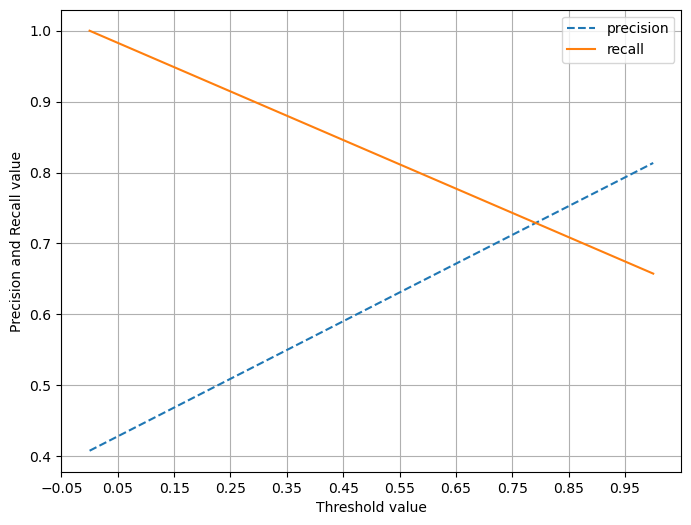

In [117]:
precision_recall_curve_plot(y_test, pred)

## Q2-13. dt_clf의 F1 Score을 소수점 5번째 자리에서 반올림하여 출력해주세요. (1점)


In [118]:
f1 = f1_score(y_test, pred)
print("F1스코어:{0:.4f}".format(f1))

F1스코어:0.7273


## Q2-14. dt_clf의 AUC Score을 소수점 5번째 자리에서 반올림하여 출력해주세요. (1점)

In [119]:
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.7769


## Q2-15. graphviz를 이용하여 트리를 시각화 시켜주세요. (3점)

(class_names=['Perish', 'Survived'], out_file='tree.dot'으로 설정해주세요)